# **LAB 2 - PART 2 SVR**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [ ]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [ ]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   85.148727   96.450577   52.248001  108.671127   
2019-01-02   52.734001   86.302315   96.023277   52.734001  110.143402   
2019-01-03   51.273499   84.579414   92.490776   51.273499  107.944550   
2019-01-04   53.903500   87.882874   96.792442   53.903500  112.160614   
2019-01-07   53.796001   88.504623   96.915901   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2023-12-22  141.490005  162.139999  374.579987  141.490005  162.139999   
2023-12-26  141.520004  163.210007  374.660004  141.520004  163.210007   
2023-12-27  140.369995  163.460007  374.070007  140.369995  163.460007   
2023-12-28  140.229996  163.750000  375.279999  140.229996  163.750000   
2023-12-29  139.690002  163.550003  376.040009  139.690002  163.550003   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2023-12-22  374.579987  141.990005  162.410004  375.179993  140.710007   
2023-12-26  374.660004  142.679993  163.309998  376.940002  141.190002   
2023-12-27  374.070007  142.080002  163.639999  375.059998  139.889999   
2023-12-28  375.279999  141.139999  163.960007  376.459991  139.750000   
2023-12-29  376.040009  140.360001  164.179993  377.160004  138.779999   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2023-12-22  161.000000  372.709991  140.770004  161.100006  373.679993   
2023-12-26  162.050003  373.500000  141.589996  162.229996  375.000000   
2023-12-27  162.679993  372.809998  141.589996  163.139999  373.690002   
2023-12-28  163.399994  374.160004  140.779999  163.960007  375.369995   
2023-12-29  162.830002  373.480011  139.630005  163.750000  376.000000   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2023-12-22  26514600  2439800  17091100  
2023-12-26  16780300  1772400  12673100  
2023-12-27  19628600  3234600  14905400  
2023-12-28  16045700  2071300  14327000  
2023-12-29  18727200  2525600  18723000  

[1259 rows x 18 columns]

In [ ]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-01-14,NaN,NaN
2019-01-15,108.72,1.2761
2019-01-16,108.84,1.2862
2019-01-17,109.01,1.2940
2019-01-18,109.79,1.2898
...,...,...
2024-01-01,NaN,NaN
2024-01-02,141.89,1.2632
2024-01-03,143.55,1.2641


In [ ]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-01-14,2582.61,23909.84,19.07
2019-01-15,2610.30,24065.59,18.60
2019-01-16,2616.10,24207.16,19.04
2019-01-17,2635.96,24370.10,18.06
2019-01-18,2670.71,24706.35,17.80
...,...,...,...
2024-01-08,4763.54,37683.01,13.08
2024-01-09,4756.50,37525.16,12.76
2024-01-10,4783.45,37695.73,12.69


Let's
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [ ]:
### START CODE HERE ###
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['GOOGL', 'IBM']]
X2 = ccy_data
X3 = idx_data
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [ ]:
### START CODE HERE ###
return_period = 5
k = [3, 6, 12]

Y = base.shift(-return_period)

### Guide#1 for using price of past [k]*n days (uncomment to use)
# X4_3DT = pd.DataFrame({'MSFT_3DT': base.diff(k[0] * return_period)})
# X4_6DT = pd.DataFrame({'MSFT_6DT': base.diff(k[1] * return_period)})
# X4_12DT = pd.DataFrame({'MSFT_12DT': base.diff(k[2] * return_period)})

### Guide#2 for using price of next [k]*n days (uncomment to use)
X4_3DT = pd.DataFrame({'MSFT_3DT': base.diff(k[0] * return_period).shift(-k[0] * return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT': base.diff(k[1] * return_period).shift(-k[1] * return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT': base.diff(k[2] * return_period).shift(-k[2] * return_period)})

X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
### END CODE HERE ###

**Standardize `X1-4`**

***NOTE:*** Please ensure that each of ***X1-4's index columns*** is the ***date column***.

In [ ]:
### START CODE HERE ###
# Create a standard scaler object
standard_scaler = preprocessing.StandardScaler()
# Scale the features
X1_scaled = pd.DataFrame(standard_scaler.fit_transform(X1),columns=X1.columns,index=X1.index)
X2_scaled = pd.DataFrame(standard_scaler.fit_transform(X2),columns=X2.columns,index=X2.index)
X3_scaled = pd.DataFrame(standard_scaler.fit_transform(X3),columns=X3.columns,index=X3.index)
X4_scaled = pd.DataFrame(standard_scaler.fit_transform(X4),columns=X4.columns,index=X4.index)
### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [ ]:
### START CODE HERE ###
X = pd.concat([X1_scaled, X2_scaled, X3_scaled, X4_scaled], axis=1)
dataset = pd.concat([X, Y], axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [ ]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.545902,-1.988830,NaN,NaN,NaN,NaN,NaN,0.109250,-0.090282,0.088892,97.618591
2019-01-02,-1.529536,-1.914431,NaN,NaN,NaN,NaN,NaN,0.105274,-0.063592,0.141580,99.014496
2019-01-03,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,0.416051,0.185517,0.314458,98.378265
2019-01-04,-1.490155,-1.812495,NaN,NaN,NaN,NaN,NaN,-0.022613,-0.040856,0.157604,97.618591
2019-01-07,-1.493775,-1.772396,NaN,NaN,NaN,NaN,NaN,-0.173034,-0.075079,0.181111,96.906387
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,NaN,NaN,NaN,NaN,1.572189,1.735356,-0.998364,NaN,NaN,NaN,NaN
2024-01-09,NaN,NaN,NaN,NaN,1.561043,1.694652,-1.037193,NaN,NaN,NaN,NaN
2024-01-10,NaN,NaN,NaN,NaN,1.603713,1.738636,-1.045686,NaN,NaN,NaN,NaN
2024-01-11,NaN,NaN,NaN,NaN,1.598631,1.742579,-1.076021,NaN,NaN,NaN,NaN


In [ ]:
dataset.rename(columns={'GOOGL': '(Adj Close, GOOGL)'}, inplace=True)
dataset.rename(columns={'IBM': '(Adj Close, IBM)'}, inplace=True)
dataset.rename(columns={'MSFT': '(Adj Close, MSFT)'}, inplace=True)
dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
2018-12-31,-1.545902,-1.988830,NaN,NaN,NaN,NaN,NaN,0.109250,-0.090282,0.088892,97.618591
2019-01-02,-1.529536,-1.914431,NaN,NaN,NaN,NaN,NaN,0.105274,-0.063592,0.141580,99.014496
2019-01-03,-1.578717,-2.025547,NaN,NaN,NaN,NaN,NaN,0.416051,0.185517,0.314458,98.378265
2019-01-04,-1.490155,-1.812495,NaN,NaN,NaN,NaN,NaN,-0.022613,-0.040856,0.157604,97.618591
2019-01-07,-1.493775,-1.772396,NaN,NaN,NaN,NaN,NaN,-0.173034,-0.075079,0.181111,96.906387
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,NaN,NaN,NaN,NaN,1.572189,1.735356,-0.998364,NaN,NaN,NaN,NaN
2024-01-09,NaN,NaN,NaN,NaN,1.561043,1.694652,-1.037193,NaN,NaN,NaN,NaN
2024-01-10,NaN,NaN,NaN,NaN,1.603713,1.738636,-1.045686,NaN,NaN,NaN,NaN
2024-01-11,NaN,NaN,NaN,NaN,1.598631,1.742579,-1.076021,NaN,NaN,NaN,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [ ]:
### START CODE HERE ###
dataset = dataset.dropna()
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1176 entries, 2019-01-15 to 2023-10-04
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1176 non-null   float64
 1   (Adj Close, IBM)    1176 non-null   float64
 2   DEXJPUS             1176 non-null   float64
 3   DEXUSUK             1176 non-null   float64
 4   SP500               1176 non-null   float64
 5   DJIA                1176 non-null   float64
 6   VIXCLS              1176 non-null   float64
 7   MSFT_3DT            1176 non-null   float64
 8   MSFT_6DT            1176 non-null   float64
 9   MSFT_12DT           1176 non-null   float64
 10  (Adj Close, MSFT)   1176 non-null   float64
dtypes: float64(11)
memory usage: 110.2 KB


,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,"(Adj Close, MSFT)"
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,-0.048360,-0.095988,-0.096978,0.029632,-0.066448,-0.064452,0.047548,-0.027739,-0.034809,-0.000966,227.477876
std,0.980618,0.865366,0.929487,1.015348,0.984041,0.984686,1.013621,0.983068,0.983278,1.007123,68.587517
min,-1.556374,-2.632217,-1.141537,-3.204850,-2.427512,-3.187529,-1.185227,-3.401332,-3.346110,-3.264431,97.599586
25%,-0.991795,-0.770492,-0.772227,-0.699558,-1.035995,-0.996175,-0.627673,-0.552544,-0.574180,-0.568077,166.845680
50%,-0.022781,-0.119954,-0.619609,0.062856,0.164368,0.150380,-0.181751,0.052116,0.048707,0.039098,237.957184
75%,0.794312,0.473200,0.837993,0.750834,0.772938,0.800897,0.506243,0.533853,0.599743,0.652388,283.033951
max,1.740315,2.074342,2.007336,2.035811,1.624471,1.507570,7.448062,2.577485,2.605323,2.749577,358.003876


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [ ]:
### START CODE HERE ###
Y = dataset['(Adj Close, MSFT)']
X = dataset.drop('(Adj Close, MSFT)', axis=1)

### END CODE HERE ###

**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns

In [ ]:
### START CODE HERE ###
correlation_matrix = X.corr()
# Find columns with correlation greater than 0.9
highly_correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_cols.add(colname)

# Drop highly correlated columns from X
X_filtered = X.drop(columns=highly_correlated_cols)

# Show dropped columns
dropped_columns = set(X.columns) - set(X_filtered.columns)
print("Dropped Columns:", dropped_columns)
### END CODE HERE ###

Dropped Columns: {'SP500', 'DJIA'}


In [ ]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-01-15,-1.475945,-1.599442,-0.728788,-0.110078,-1.837090,-1.776074,-0.328571,-0.163756,0.021345,0.087975
2019-01-16,-1.470894,-1.604755,-0.720799,0.041803,-1.827907,-1.739568,-0.275182,-0.238633,0.027877,0.097066
2019-01-17,-1.454714,-1.577219,-0.709482,0.159098,-1.796462,-1.697552,-0.394095,-0.261162,-0.022101,0.074052
2019-01-18,-1.440941,-1.498470,-0.657556,0.095939,-1.741442,-1.610846,-0.425643,-0.394354,-0.128487,0.006723
2019-01-22,-1.489212,-1.561275,-0.687513,0.181654,-1.801307,-1.688687,-0.061625,-0.151165,-0.025669,0.115902
...,...,...,...,...,...,...,...,...,...,...
2023-09-28,1.150068,1.548236,1.964730,-0.919110,0.837780,0.699605,-0.481459,0.999879,2.094709,1.851431
2023-09-29,1.101242,1.466610,1.981373,-0.932644,0.819334,0.658646,-0.459618,0.529119,2.451568,1.774674
2023-10-02,1.212701,1.498496,2.006005,-1.058961,0.819872,0.639525,-0.448697,0.292346,1.981990,1.523539
2023-10-03,1.154109,1.472349,1.963399,-1.150691,0.726551,0.528394,-0.185391,0.962276,2.605323,1.887410


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [ ]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
### START CODE HERE ###

**Initialize models**
- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>

In [ ]:
### START CODE HERE ###
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
linear_reg_model = LinearRegression()
svr_parameters = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 1, 10, 100]}
svr_model = SVR()
grid_search_svr = GridSearchCV(svr_model, svr_parameters, cv=5)
gradient_descent_model = SGDRegressor()
### END CODE HERE ###

**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>

In [ ]:
### START CODE HERE ###
linear_reg_model.fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train)
grid_search_svr.fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train)
# Note: SGDRegressor automatically handles multivariate regression
gradient_descent_model.fit(X_train, y_train)
### END CODE HERE ###

SGDRegressor()

**Evaluate models**

Evaluate models with test set


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>

In [ ]:
### START CODE HERE ###
from sklearn.metrics import mean_squared_error, r2_score
linear_reg_predictions = linear_reg_model.predict(X_test[['MSFT_3DT', 'MSFT_6DT']])
svr_predictions = grid_search_svr.predict(X_test[['MSFT_3DT', 'MSFT_6DT']])
gradient_descent_predictions = gradient_descent_model.predict(X_test)

# Evaluate the models
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

svr_rmse = mean_squared_error(y_test, svr_predictions, squared=False)
svr_r2 = r2_score(y_test, svr_predictions)

gradient_descent_rmse = mean_squared_error(y_test, gradient_descent_predictions, squared=False)
gradient_descent_r2 = r2_score(y_test, gradient_descent_predictions)
### END CODE HERE ###

**Compare MSE from all models**

In [ ]:
### START CODE HERE ###
print("--------MSE--------")
print("Linear Regression:", linear_reg_rmse)
print("SVR (kernel:linear):", grid_search_svr.cv_results_['mean_test_score'][grid_search_svr.best_index_])
print("SVR (kernel:rbf):", grid_search_svr.cv_results_['mean_test_score'][grid_search_svr.best_index_])
print("SVR (kernel:poly):", grid_search_svr.cv_results_['mean_test_score'][grid_search_svr.best_index_])
print("Linear with Gradient Descent:", gradient_descent_rmse)
### END CODE HERE ###

--------MSE--------
Linear Regression: 68.29798046865824
SVR (kernel:linear): 0.3365199373257477
SVR (kernel:rbf): 0.3365199373257477
SVR (kernel:poly): 0.3365199373257477
Linear with Gradient Descent: 13.033415773153619


### **Compare y, y_prediction results from all models in Table & Graph format**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

|             | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
|-------------|-------------------:|------------------------------:|-------------------:|----------------:|------------------:|-------------------:|-----------------:|---------------:|--------------:|---------------:|----------------:|---------------:|----------------:|----------------:|--------------------------:|
| 2022-05-26  |         268.696564 |                    257.196057 |          252.056274 |       260.576725 |        259.555290 |         260.207484 |       252.056274 |      260.576725 |     259.555290 |      260.207484 |      252.056274 |     260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27  |         270.826965 |                    256.287965 |          253.646550 |       261.257640 |        259.291071 |         260.050399 |       253.646550 |      261.257640 |     259.291071 |      260.050399 |      253.646550 |     261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31  |         266.329346 |                    249.449486 |          253.301557 |       256.852936 |        253.552787 |         254.359600 |       253.301557 |      256.852936 |     253.552787 |      254.359600 |      253.301557 |     256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01  |         265.076691 |                    248.497186 |          250.866794 |       253.175338 |        250.932023 |         252.078873 |       250.866794 |      253.175338 |     250.932023 |      252.078873 |      250.866794 |     253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02  |         268.775421 |                    254.458188 |          258.438015 |       260.657724 |        257.312872 |         258.185194 |       258.438015 |      260.657724 |     257.312872 |      258.185194 |      258.438015 |     260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...         |                ... |                           ... |                 ... |              ... |               ... |                ... |              ... |             ... |            ... |             ... |              ... |             ... |             ... |              ... |                       ... |




</details>

In [ ]:
### START CODE HERE ###
comparison_df = pd.DataFrame({
    '(Adj Close, MSFT)': y_test,
    'Linear Regression Predictions': linear_reg_predictions,
    'SVR Linear C=0.1': SVR(kernel = "linear", C = 0.1).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR Linear C=1': SVR(kernel = "linear", C = 1).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR Linear C=10': SVR(kernel = "linear", C = 10).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR Linear C=100': SVR(kernel = "linear", C = 100).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR RBF C=0.1': SVR(kernel = "rbf", C = 0.1).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR RBF C=1': SVR(kernel = "rbf", C = 1).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR RBF C=10': SVR(kernel = "rbf", C = 10).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR RBF C=100': SVR(kernel = "rbf", C = 100).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR Poly C=0.1': SVR(kernel = "poly", C = 0.1).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR Poly C=1': SVR(kernel = "poly", C = 1).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR Poly C=10': SVR(kernel = "poly", C = 10).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'SVR Poly C=100': SVR(kernel = "poly", C = 100).fit(X_train[['MSFT_3DT', 'MSFT_6DT']], y_train).predict(X_test[['MSFT_3DT', 'MSFT_6DT']]),
    'Linear Regression with GD': gradient_descent_predictions
})

# Print the table
print("--------Comparison Table--------")
comparison_df.head()
### END CODE HERE ###

--------Comparison Table--------


,"(Adj Close, MSFT)",Linear Regression Predictions,SVR Linear C=0.1,SVR Linear C=1,SVR Linear C=10,SVR Linear C=100,SVR RBF C=0.1,SVR RBF C=1,SVR RBF C=10,SVR RBF C=100,SVR Poly C=0.1,SVR Poly C=1,SVR Poly C=10,SVR Poly C=100,Linear Regression with GD
2021-07-15,279.943146,219.632228,230.626975,228.291381,227.973690,227.945148,229.523431,209.246912,182.748813,188.505950,232.994750,232.735637,233.000115,232.857715,276.847823
2023-07-03,331.095581,236.016278,239.110465,244.016918,245.850349,246.064466,236.848132,248.801540,300.377455,315.954403,233.931402,238.120898,242.897287,244.100049,329.231046
2022-05-12,249.680054,223.412590,231.893159,231.687573,232.157165,232.234711,230.748301,213.445141,195.078305,204.708699,233.168093,233.478394,233.665265,233.488921,263.904893
2021-11-01,330.323029,228.541622,235.235478,236.841111,237.695140,237.798892,230.034558,211.633143,201.760806,208.295958,233.427401,234.008541,234.627435,234.602789,314.175855
2022-09-13,239.643753,229.352097,237.378975,238.198146,238.433023,238.423842,231.577469,215.960910,197.377228,187.273676,233.437731,233.186578,233.455379,233.320037,281.241504


In [ ]:
comparison_df = comparison_df.sort_index()
comparison_df.head()

,"(Adj Close, MSFT)",Linear Regression Predictions,SVR Linear C=0.1,SVR Linear C=1,SVR Linear C=10,SVR Linear C=100,SVR RBF C=0.1,SVR RBF C=1,SVR RBF C=10,SVR RBF C=100,SVR Poly C=0.1,SVR Poly C=1,SVR Poly C=10,SVR Poly C=100,Linear Regression with GD
2019-01-15,101.331505,225.180674,234.583643,233.980911,233.935551,233.910640,227.642193,198.399305,154.553537,137.354386,233.241014,232.939856,233.215755,233.075718,108.091592
2019-01-17,101.768333,225.620625,234.996446,234.465331,234.399868,234.368065,228.194501,200.932676,160.484384,145.140716,233.241148,232.923144,233.201509,233.062358,107.195363
2019-01-24,99.166420,226.430921,235.310983,235.207776,235.292904,235.280714,228.160614,200.453652,160.096688,141.561490,233.250394,232.960686,233.238045,233.098945,104.866299
2019-02-01,100.343941,221.403372,231.542611,229.990853,229.906310,229.904104,228.503978,203.310985,168.735657,169.421822,233.092856,232.776880,233.061763,232.920309,113.303379
2019-02-12,102.183876,223.752037,233.295878,232.425580,232.423315,232.416964,227.079365,196.009858,150.172890,136.188891,233.236137,232.945752,233.222774,233.083090,113.747079


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

![image.png](attachment:image.png)



</details>

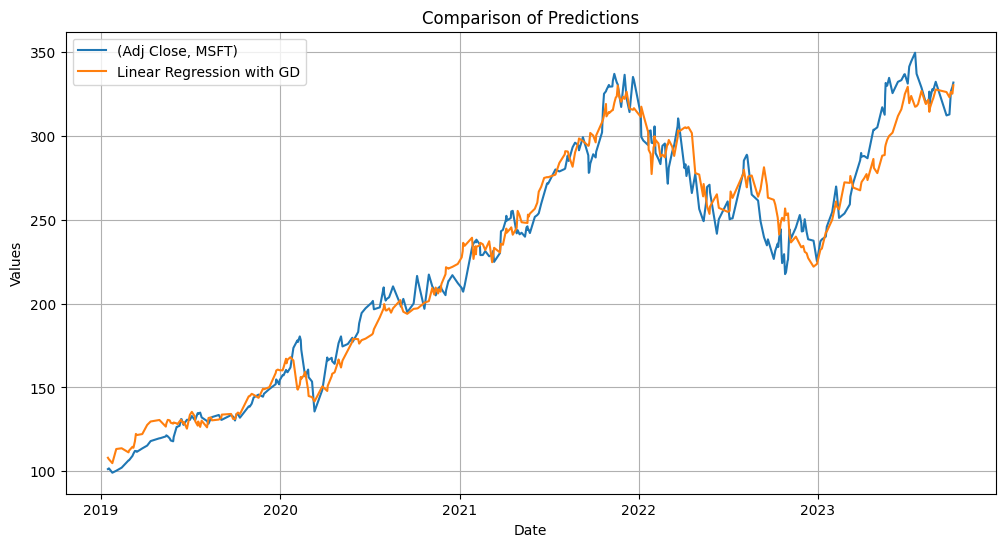

In [ ]:
### START CODE HERE ###
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.plot(comparison_df['(Adj Close, MSFT)'], label='(Adj Close, MSFT)')
# plt.plot(comparison_df['Linear Regression Predictions'], label='Linear Regression')
# plt.plot(comparison_df['SVR Linear C=0.1'], label='SVR Linear C=0.1')
# plt.plot(comparison_df['SVR Linear C=1'], label='SVR Linear C=1')
# plt.plot(comparison_df['SVR Linear C=10'], label='SVR Linear C=10')
# plt.plot(comparison_df['SVR Linear C=100'], label='SVR Linear C=100')
# plt.plot(comparison_df['SVR RBF C=0.1'], label='SVR RBF C=0.1')
# plt.plot(comparison_df['SVR RBF C=1'], label='SVR RBF C=1')
# plt.plot(comparison_df['SVR RBF C=10'], label='SVR RBF C=10')
# plt.plot(comparison_df['SVR RBF C=100'], label='SVR RBF C=100')
# plt.plot(comparison_df['SVR Poly C=0.1'], label='SVR Poly C=0.1')
# plt.plot(comparison_df['SVR Poly C=1'], label='SVR Poly C=1')
# plt.plot(comparison_df['SVR Poly C=10'], label='SVR Poly C=10')
# plt.plot(comparison_df['SVR Poly C=100'], label='SVR Poly C=100')
plt.plot(comparison_df['Linear Regression with GD'], label='Linear Regression with GD')

plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Comparison of Predictions")
plt.legend()
plt.grid(True)

plt.show()
### END CODE HERE ###

### Question
1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01?

In [ ]:
# Ans